# Machine Learning Assignment - 5

In [1]:
#Importing packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
%matplotlib inline

## 1. Data Processing:


### a) Import the data: You are provided separate .csv files for train and test.

Train shape: (507, 148)
Test shape: (168, 148)


In [2]:
train = pd.read_csv('train_data.csv')
test  = pd.read_csv('test_data.csv')
print('Train shape:',train.shape)
print('Test shape:',test.shape)

Train shape: (507, 148)
Test shape: (168, 148)


In [3]:
train.head()

,class,BrdIndx,Area,Round,Bright,Compact,ShpIndx,Mean_G,Mean_R,Mean_NIR,...,SD_NIR_140,LW_140,GLCM1_140,Rect_140,GLCM2_140,Dens_140,Assym_140,NDVI_140,BordLngth_140,GLCM3_140
0,concrete,1.32,131,0.81,222.74,1.66,2.18,192.94,235.11,240.15,...,31.15,5.04,0.80,0.58,8.56,0.82,0.98,-0.10,1512,1287.52
1,shadow,1.59,864,0.94,47.56,1.41,1.87,36.82,48.78,57.09,...,12.01,3.70,0.52,0.96,7.01,1.69,0.86,-0.14,196,2659.74
2,shadow,1.41,409,1.00,51.38,1.37,1.53,41.72,51.96,60.48,...,18.75,3.09,0.90,0.63,8.32,1.38,0.84,0.10,1198,720.38
3,tree,2.58,187,1.91,70.08,3.41,3.11,93.13,55.20,61.92,...,27.67,6.33,0.89,0.70,8.56,1.10,0.96,0.20,524,891.36
4,asphalt,2.60,116,2.05,89.57,3.06,3.02,73.17,94.89,100.64,...,32.05,1.01,0.83,0.75,8.62,2.08,0.08,-0.10,496,1194.76


### b) Remove any rows that have missing data across both sets of data.


In [4]:
print(train.isnull().sum())

class            0
BrdIndx          0
Area             0
Round            0
Bright           0
                ..
Dens_140         0
Assym_140        0
NDVI_140         0
BordLngth_140    0
GLCM3_140        0
Length: 148, dtype: int64


In [5]:
print(test.isnull().sum())

class            0
BrdIndx          0
Area             0
Round            0
Bright           0
                ..
Dens_140         0
Assym_140        0
NDVI_140         0
BordLngth_140    0
GLCM3_140        0
Length: 148, dtype: int64


Based on the above missing value report we can conclude that there are no missing values.


### c) The target variable (dependent variable) is called "class", make sure to separate this out into a "y_train" and "y_test" and remove from your "X_train" and "X_test". 

In [6]:
#Seperating the target variable and predictors
y_train = train.iloc[:,0]
X_train = train.iloc[:,1:]
y_test  = test.iloc[:,0]
X_test  = test.iloc[:,1:]

### d) Scale all features / predictors (NOT THE TARGET VARIABLE)
Feel free to use the sklearn tool "StandardScaler" - more info here: http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html (Links to an external site.)
Note: We need to scale here due to SVM. Please refer to previous assignments if you have forgotten appropriate scaling.

In [7]:
#Scaling the X_train and X_test
scaler = StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
scaler.fit(X_test)
X_test_scaled = scaler.transform(X_test)

## 2. Random Forest Classifier - Base Model:

#### Start by creating a simple Random Forest only using default parameters - this will let us compare SVMs to Random Forest in multiclass problems.
#### a) Use the RandomForestClassifier in sklearn. Fit your model on the training data.


In [8]:
# Instantiate a random forests classifer
rf = RandomForestClassifier(random_state=20,class_weight='balanced')
# Fitting the data to the model
rf.fit(X_train_scaled, y_train,clas)

RandomForestClassifier(random_state=20)


#### b) Use the fitted model to predict on test data. Use the .predict() method to get the predicted classes.



In [9]:
#predicting the test data based on the trained model
y_pred = rf.predict(X_test_scaled,clas)

#predicting probabilities to calculate roc_auc scores
y_test_pred_prob = rf.predict_proba(X_test)

#### c) Calculate the confusion matrix and classification report for the test data. 


In [10]:
#Confusion matrix
confusion_matrix(y_test,y_pred)

array([[14,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 1, 19,  0,  4,  1,  0,  0,  0,  0],
       [ 0,  1, 14,  0,  0,  0,  0,  0,  0],
       [ 0,  2,  0, 20,  0,  0,  0,  1,  0],
       [ 0,  0,  0,  0, 24,  0,  0,  0,  5],
       [ 1,  0,  1,  0,  0, 13,  0,  0,  0],
       [ 2,  0,  0,  0,  0,  0, 14,  0,  0],
       [ 0,  1,  0,  5,  2,  0,  0,  6,  0],
       [ 0,  0,  0,  1,  1,  0,  0,  0, 15]])

In [11]:
#Classification report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

    asphalt        0.78      1.00      0.88        14
   building        0.83      0.76      0.79        25
        car        0.93      0.93      0.93        15
   concrete        0.67      0.87      0.75        23
      grass        0.86      0.83      0.84        29
       pool        1.00      0.87      0.93        15
     shadow        1.00      0.88      0.93        16
       soil        0.86      0.43      0.57        14
       tree        0.75      0.88      0.81        17

    accuracy                           0.83       168
   macro avg       0.85      0.83      0.83       168
weighted avg       0.84      0.83      0.82       168




#### d)  Calculate predictions for the training data & build the classification report & confusion matrix. Are there signs of overfitting? Why or why not?



In [12]:
#predicting the classes based on train data
y_train_pred = rf.predict(X_train_scaled)

#confusion matrix
print("\t\t\t Confusion Matrix")
print(confusion_matrix(y_train,y_train_pred))
print('\n')

print("\t\t\t Classification report")

#classification report
print(classification_report(y_train,y_train_pred))

			 Confusion Matrix
[[45  0  0  0  0  0  0  0  0]
 [ 0 97  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0]
 [ 0  0  0 93  0  0  0  0  0]
 [ 0  0  0  0 83  0  0  0  0]
 [ 0  0  0  0  0 14  0  0  0]
 [ 0  0  0  0  0  0 45  0  0]
 [ 0  0  0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0  0  0 89]]


			 Classification report
              precision    recall  f1-score   support

    asphalt        1.00      1.00      1.00        45
   building        1.00      1.00      1.00        97
        car        1.00      1.00      1.00        21
   concrete        1.00      1.00      1.00        93
      grass        1.00      1.00      1.00        83
       pool        1.00      1.00      1.00        14
     shadow        1.00      1.00      1.00        45
       soil        1.00      1.00      1.00        20
       tree        1.00      1.00      1.00        89

    accuracy                           1.00       507
   macro avg       1.00      1.00      1.00       507
weighted avg       1.00      1

Based on the classification report of the train data we can observe that the model has generalized the data to the maximum extent and was able to predict the train data with 100% accuracy. So, based on the above metrics and the test metrics we can conclude that the **random forest with default parameters is overfitting**.

#### e) Identify the top 5 features. Feel free to print a list OR to make a plot. 

In [13]:
#the important features deemed by the model
rf.feature_importances_[:10,]

array([0.00283965, 0.00708813, 0.00191604, 0.01351364, 0.00251535,
       0.00180304, 0.02001479, 0.02601936, 0.02816106, 0.00556653])

In [14]:
# Assigning the column names
features = X_train.columns[:10,]
features

Index(['BrdIndx', 'Area', 'Round', 'Bright', 'Compact', 'ShpIndx', 'Mean_G',
       'Mean_R', 'Mean_NIR', 'SD_G'],
      dtype='object')

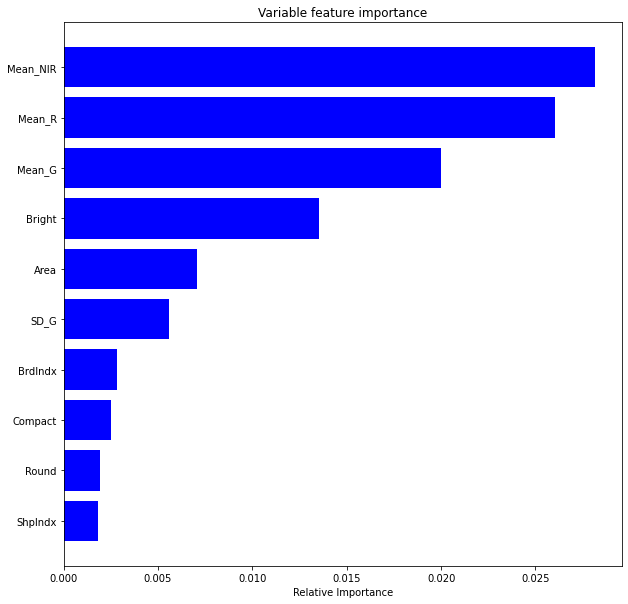

In [15]:
#Barplot to plot the features according to the importance
plt.figure(figsize=(10,10))
importance = rf.feature_importances_[:10,]
indices = np.argsort(importance)
plt.title('Variable feature importance')
plt.barh(range(len(indices)), importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Based on the feature importance plot, the top 5 features are **Mean_NIR, Mean_R, Mean_G, Bright, Area**.

## 3. LinearSVM Classifier - Base Model:
Create a simple LinearSVC Classifier only using default parameters.


### a) Use the LinearSVC in sklearn. Fit your model on the training data.


In [16]:
# Next lets try Linear SVM
svc = svm.SVC(kernel='linear', C=1)
#Fitting the data to the model
svc.fit(X_train_scaled, y_train)

SVC(C=1, kernel='linear')

### b) Use the fitted model to predict on test data. Use the .predict() method to get the predicted classes.

In [17]:
y_pred = svc.predict(X_test_scaled)

### c) Calculate the confusion matrix and classification report for test data.

In [18]:
#confusion matrix
print("\t\t\t Confusion Matrix")
print(confusion_matrix(y_test,y_pred))
print('\n')

print("\t\t\t Classification report")

#classification report
print(classification_report(y_test,y_pred))

			 Confusion Matrix
[[13  0  0  0  0  0  1  0  0]
 [ 0 22  1  2  0  0  0  0  0]
 [ 0  0 13  1  0  0  0  1  0]
 [ 0  4  0 16  0  0  0  3  0]
 [ 0  0  0  1 22  0  0  0  6]
 [ 0  2  0  0  0 12  1  0  0]
 [ 1  0  0  0  0  0 15  0  0]
 [ 0  0  1  4  3  0  0  6  0]
 [ 0  0  0  1  1  0  0  0 15]]


			 Classification report
              precision    recall  f1-score   support

    asphalt        0.93      0.93      0.93        14
   building        0.79      0.88      0.83        25
        car        0.87      0.87      0.87        15
   concrete        0.64      0.70      0.67        23
      grass        0.85      0.76      0.80        29
       pool        1.00      0.80      0.89        15
     shadow        0.88      0.94      0.91        16
       soil        0.60      0.43      0.50        14
       tree        0.71      0.88      0.79        17

    accuracy                           0.80       168
   macro avg       0.81      0.80      0.80       168
weighted avg       0.80      0

The **precision** of the linear SVM model is **81%** and the **accuracy** is **80%**.

### d)  Calculate predictions for the training data & build the classification report & confusion matrix. Are there signs of overfitting? Why or why not?

In [19]:
#predicting the classes based on train data
y_train_pred = svc.predict(X_train_scaled)

#confusion matrix
print("\t\t\t Confusion Matrix")
print(confusion_matrix(y_train,y_train_pred))
print('\n')

print("\t\t\t Classification report")

#classification report
print(classification_report(y_train,y_train_pred))

			 Confusion Matrix
[[45  0  0  0  0  0  0  0  0]
 [ 0 97  0  0  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0]
 [ 0  0  0 93  0  0  0  0  0]
 [ 0  0  0  0 83  0  0  0  0]
 [ 0  0  0  0  0 14  0  0  0]
 [ 0  0  0  0  0  0 45  0  0]
 [ 0  0  0  0  0  0  0 20  0]
 [ 0  0  0  0  0  0  0  0 89]]


			 Classification report
              precision    recall  f1-score   support

    asphalt        1.00      1.00      1.00        45
   building        1.00      1.00      1.00        97
        car        1.00      1.00      1.00        21
   concrete        1.00      1.00      1.00        93
      grass        1.00      1.00      1.00        83
       pool        1.00      1.00      1.00        14
     shadow        1.00      1.00      1.00        45
       soil        1.00      1.00      1.00        20
       tree        1.00      1.00      1.00        89

    accuracy                           1.00       507
   macro avg       1.00      1.00      1.00       507
weighted avg       1.00      1

Based on the classification report of the train data we can observe that the model has generalized the data to the maximum extent and was able to predict the train data with **100% accuracy**. So, based on the above metrics and the test metrics we can conclude that the random forest with default parameters is **overfitting**.

## 4. Support Vector Machine Classifier + Linear Kernel + Grid Search:

We will now use GridSearchCV to try various hyperparameters in a SVM with linear kernel.

### a) Use SVC from sklearn with kernel = "linear". Run the GridSearchCV using the following (SVMs run much faster than RandomForest):

C: 0.01 - 10 in increments of 0.2 (consider using the np.arange() method from numpy to build out a sequence of values)

Note: Feel free to try out more parameters, the above is the bare minimum for this assignment.

Use 5 cross-fold and the default scoring. Please set verbose = 0 to reduce the printing (sorry to our grader for not specifying this last week!).



In [20]:
param_grid = {'C': np.arange(0.01, 10, 0.2).tolist(),
              'kernel': ['linear']} 

# create AdaBoost Classifier model 
svc = svm.SVC()

# Use 5 cross-fold and for scoring use "roc_auc" 
svc_Grid = GridSearchCV(svc, param_grid, cv = 5,verbose=0)

In [21]:
#fit our model to our train data
svc_Grid.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.21000000000000002, 0.41000000000000003,
                               0.6100000000000001, 0.81, 1.01,
                               1.2100000000000002, 1.4100000000000001, 1.61,
                               1.81, 2.01, 2.21, 2.41, 2.61, 2.81, 3.01, 3.21,
                               3.41, 3.61, 3.81, 4.01, 4.21, 4.41, 4.61,
                               4.8100000000000005, 5.01, 5.21, 5.41, 5.61,
                               5.8100000000000005, ...],
                         'kernel': ['linear']})

#### b) Identify the best performing model:

.best_params_() : This method outputs to best performing parameters  
.best_estimator_() : This method outputs the best performing model, and can be used for predicting on the X_test


In [22]:
#best performing parameters
svc_Grid.best_params_

{'C': 0.01, 'kernel': 'linear'}

In [23]:
#best performing model
svc_Grid.best_estimator_

SVC(C=0.01, kernel='linear')

### c) Use the best estimator model to predict on test data. Use the .predict() method to get the predicted classes.



In [24]:
#Initializing the best estimator model
svc_best = svm.SVC(C=0.01, kernel='linear')

#Fitting the best fit model on train data
svc_best.fit(X_train_scaled,y_train)

#predicting the classes of test data
y_pred = svc_best.predict(X_test_scaled)

### d) Calculate the confusion matrix and classification report for test data.


In [25]:
#confusion matrix
print("\t\t\t Confusion Matrix")
print(confusion_matrix(y_test,y_pred))
print('\n')

print("\t\t\t Classification report")

#classification report
print(classification_report(y_test,y_pred))

			 Confusion Matrix
[[13  0  0  0  0  0  1  0  0]
 [ 0 22  0  2  1  0  0  0  0]
 [ 0  1 14  0  0  0  0  0  0]
 [ 0  3  0 19  0  0  0  1  0]
 [ 0  0  0  1 25  0  0  0  3]
 [ 0  1  0  0  0 13  1  0  0]
 [ 3  0  0  0  0  0 13  0  0]
 [ 0  1  0  6  3  0  0  4  0]
 [ 0  0  0  1  0  0  0  0 16]]


			 Classification report
              precision    recall  f1-score   support

    asphalt        0.81      0.93      0.87        14
   building        0.79      0.88      0.83        25
        car        1.00      0.93      0.97        15
   concrete        0.66      0.83      0.73        23
      grass        0.86      0.86      0.86        29
       pool        1.00      0.87      0.93        15
     shadow        0.87      0.81      0.84        16
       soil        0.80      0.29      0.42        14
       tree        0.84      0.94      0.89        17

    accuracy                           0.83       168
   macro avg       0.85      0.82      0.81       168
weighted avg       0.84      0

The **precision** of the linear SVM model is **85%** and the **accuracy** is **83%**.

### e)  Calculate predictions for the training data & build the classification report & confusion matrix. Are there signs of overfitting? Why or why not?


In [26]:
#predicting the classes based on train data
y_train_pred = svc_best.predict(X_train_scaled)

#confusion matrix
print("\t\t\t Confusion Matrix")
print(confusion_matrix(y_train,y_train_pred))
print('\n')

print("\t\t\t Classification report")

#classification report
print(classification_report(y_train,y_train_pred))

			 Confusion Matrix
[[40  0  0  0  0  0  5  0  0]
 [ 2 87  0  7  0  0  1  0  0]
 [ 0  1 19  1  0  0  0  0  0]
 [ 0  9  0 83  1  0  0  0  0]
 [ 0  1  0  0 70  0  0  0 12]
 [ 0  1  0  0  1 12  0  0  0]
 [ 1  0  0  0  0  0 43  0  1]
 [ 0  3  0  4  2  0  0 11  0]
 [ 0  0  0  0  3  0  1  0 85]]


			 Classification report
              precision    recall  f1-score   support

    asphalt        0.93      0.89      0.91        45
   building        0.85      0.90      0.87        97
        car        1.00      0.90      0.95        21
   concrete        0.87      0.89      0.88        93
      grass        0.91      0.84      0.88        83
       pool        1.00      0.86      0.92        14
     shadow        0.86      0.96      0.91        45
       soil        1.00      0.55      0.71        20
       tree        0.87      0.96      0.91        89

    accuracy                           0.89       507
   macro avg       0.92      0.86      0.88       507
weighted avg       0.89      0

Based on the classification report of the train data we can observe that the model is **not over fitting**.

One of the conditions for overfitting is that the train error is too large than the test error. In this Linear SVM classifier with GridSearchCV the training error is greater than the test error, however, it's not that large to be termed as overfitting. 

## 5. Support Vector Machine Classifier + Polynomial Kernel + Grid Search:

We will now use GridSearchCV to try various hyperparameters in a SVM with a polynomial kernel.





### a) Use SVC from sklearn with kernel = "poly". Run the GridSearchCV using the following:

C: 0.01 - 10 in increments of 0.2  
degree: 2, 3, 4, 5, 6

Note: Feel free to try out more parameters, the above is the bare minimum for this assignment.

Use 5 cross-fold and the default scoring.



In [27]:
param_grid = {'C': np.arange(0.01, 10, 0.2).tolist(),
              'kernel': ['poly'],
             'degree' : [2,3,4,5,6]} 

# create AdaBoost Classifier model 
svc = svm.SVC()

# Use 5 cross-fold and for scoring use "roc_auc" 
svc_Grid = GridSearchCV(svc, param_grid, cv = 5,verbose=0)

In [28]:
#fit our model to our train data
svc_Grid.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.21000000000000002, 0.41000000000000003,
                               0.6100000000000001, 0.81, 1.01,
                               1.2100000000000002, 1.4100000000000001, 1.61,
                               1.81, 2.01, 2.21, 2.41, 2.61, 2.81, 3.01, 3.21,
                               3.41, 3.61, 3.81, 4.01, 4.21, 4.41, 4.61,
                               4.8100000000000005, 5.01, 5.21, 5.41, 5.61,
                               5.8100000000000005, ...],
                         'degree': [2, 3, 4, 5, 6], 'kernel': ['poly']})

### b) Identify the best performing model:

.best_params_() : This method outputs to best performing parameters
.best_estimator_() : This method outputs the best performing model, and can be used for predicting on the X_test



In [29]:
#best performing parameters
svc_Grid.best_params_

{'C': 3.81, 'degree': 3, 'kernel': 'poly'}

In [30]:
#best performing model
svc_Grid.best_estimator_

SVC(C=3.81, kernel='poly')

### c) Use the best estimator model to predict on test data. Use the .predict() method to get the predicted classes.



In [31]:
#Initializing the best estimator model
svc_best = svm.SVC(C=3.81, kernel='poly', degree =3 )

#Fitting the best fit model on train data
svc_best.fit(X_train_scaled,y_train)

#predicting the classes of test data
y_pred = svc_best.predict(X_test_scaled)

### d) Calculate the confusion matrix and classification report for test data.

In [32]:
#confusion matrix
print("\t\t\t Confusion Matrix")
print(confusion_matrix(y_test,y_pred))
print('\n')

print("\t\t\t Classification report")

#classification report
print(classification_report(y_test,y_pred))

			 Confusion Matrix
[[13  0  0  0  0  0  1  0  0]
 [ 0 18  0  4  3  0  0  0  0]
 [ 0  2 11  0  0  1  0  1  0]
 [ 0  3  0 19  1  0  0  0  0]
 [ 0  0  0  0 26  0  0  1  2]
 [ 0  4  0  0  0 10  1  0  0]
 [ 1  0  0  0  0  0 14  0  1]
 [ 0  1  0  5  8  0  0  0  0]
 [ 0  0  0  1  3  0  0  0 13]]


			 Classification report
              precision    recall  f1-score   support

    asphalt        0.93      0.93      0.93        14
   building        0.64      0.72      0.68        25
        car        1.00      0.73      0.85        15
   concrete        0.66      0.83      0.73        23
      grass        0.63      0.90      0.74        29
       pool        0.91      0.67      0.77        15
     shadow        0.88      0.88      0.88        16
       soil        0.00      0.00      0.00        14
       tree        0.81      0.76      0.79        17

    accuracy                           0.74       168
   macro avg       0.72      0.71      0.71       168
weighted avg       0.71      0

The **precision** of the polynomial SVM model is **85%** and the **accuracy** is **83%**.

### e)  Calculate predictions for the training data & build the classification report & confusion matrix. Are there signs of overfitting? Why or why not?



In [33]:
#predicting the classes based on train data
y_train_pred = svc_best.predict(X_train_scaled)

#confusion matrix
print("\t\t\t Confusion Matrix")
print(confusion_matrix(y_train,y_train_pred))
print('\n')

print("\t\t\t Classification report")

#classification report
print(classification_report(y_train,y_train_pred))

			 Confusion Matrix
[[44  0  0  0  1  0  0  0  0]
 [ 0 95  0  1  1  0  0  0  0]
 [ 0  0 20  0  1  0  0  0  0]
 [ 0  1  0 91  1  0  0  0  0]
 [ 0  1  0  0 81  0  0  0  1]
 [ 0  0  0  0  1 13  0  0  0]
 [ 0  0  0  0  0  0 45  0  0]
 [ 0  0  0  0 11  0  0  9  0]
 [ 0  0  0  0  5  0  0  0 84]]


			 Classification report
              precision    recall  f1-score   support

    asphalt        1.00      0.98      0.99        45
   building        0.98      0.98      0.98        97
        car        1.00      0.95      0.98        21
   concrete        0.99      0.98      0.98        93
      grass        0.79      0.98      0.88        83
       pool        1.00      0.93      0.96        14
     shadow        1.00      1.00      1.00        45
       soil        1.00      0.45      0.62        20
       tree        0.99      0.94      0.97        89

    accuracy                           0.95       507
   macro avg       0.97      0.91      0.93       507
weighted avg       0.96      0

From the initial glance of the classification it may look like the model is not over fitting, however, if we observe some values across some labels we can see that there's enough evidence to label this model to be **overfitting**.

One of the conditions for overfitting is that the train error is too large than the test error. In this case we can compare the accuracy values of the test and train dataset to determine the overfit. The train set accuracy us 95% and test set accuracy is 83%. The train accuracy is significantly greater than train accuracy. Based on these values we can conclude that the Polynomial SVM classifier with GridSearchCV is **overfitting**. 

## 6. Support Vector Machine Classifier + RBF Kernel + Grid Search:

We will now use GridSearchCV to try various hyperparameters in a SVM with a RBF kernel.



### a) Use SVC from sklearn with kernel = "rbf". Run the GridSearchCV using the following:

C: 0.01 - 10 in increments of 0.2  
gamma: 0.01,  0.1, 1, 10, 100

Note: Feel free to try out more parameters, the above is the bare minimum for this assignment.

Use 5 cross-fold and the default scoring.


In [34]:
param_grid = {'C': np.arange(0.01, 10, 0.2).tolist(),
              'kernel': ['rbf'],
             'gamma' : [0.01, 0.1, 1, 10, 100]} 

# create AdaBoost Classifier model 
svc = svm.SVC()

# Use 5 cross-fold and for scoring use "roc_auc" 
svc_Grid = GridSearchCV(svc, param_grid, cv = 5,verbose=0)

In [35]:
#fit our model to our train data
svc_Grid.fit(X_train_scaled,y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [0.01, 0.21000000000000002, 0.41000000000000003,
                               0.6100000000000001, 0.81, 1.01,
                               1.2100000000000002, 1.4100000000000001, 1.61,
                               1.81, 2.01, 2.21, 2.41, 2.61, 2.81, 3.01, 3.21,
                               3.41, 3.61, 3.81, 4.01, 4.21, 4.41, 4.61,
                               4.8100000000000005, 5.01, 5.21, 5.41, 5.61,
                               5.8100000000000005, ...],
                         'gamma': [0.01, 0.1, 1, 10, 100], 'kernel': ['rbf']})


### b) Identify the best performing model:

.best_params_() : This method outputs to best performing parameters
.best_estimator_() : This method outputs the best performing model, and can be used for predicting on the X_test



In [36]:
#best performing parameters
svc_Grid.best_params_

{'C': 2.81, 'gamma': 0.01, 'kernel': 'rbf'}

In [37]:
#best performing model
svc_Grid.best_estimator_

SVC(C=2.81, gamma=0.01)

### c) Use the best estimator model to predict on test data. Use the .predict() method to get the predicted classes.



In [38]:
#Initializing the best estimator model
svc_best = svm.SVC(C=2.81, gamma =0.01,kernel='rbf')

#Fitting the best fit model on train data
svc_best.fit(X_train_scaled,y_train)

#predicting the classes of test data
y_pred = svc_best.predict(X_test_scaled)

### d) Calculate the confusion matrix and classification report for test data.


In [39]:
#confusion matrix
print("\t\t\t Confusion Matrix")
print(confusion_matrix(y_test,y_pred))
print('\n')

print("\t\t\t Classification report")

#classification report
print(classification_report(y_test,y_pred))


			 Confusion Matrix
[[13  0  0  0  0  0  1  0  0]
 [ 0 19  0  5  1  0  0  0  0]
 [ 0  0 14  1  0  0  0  0  0]
 [ 0  3  0 20  0  0  0  0  0]
 [ 0  1  0  0 24  0  0  0  4]
 [ 0  0  0  0  0 14  1  0  0]
 [ 1  0  0  1  0  0 14  0  0]
 [ 0  1  0  5  3  0  0  5  0]
 [ 0  0  0  1  0  0  0  0 16]]


			 Classification report
              precision    recall  f1-score   support

    asphalt        0.93      0.93      0.93        14
   building        0.79      0.76      0.78        25
        car        1.00      0.93      0.97        15
   concrete        0.61      0.87      0.71        23
      grass        0.86      0.83      0.84        29
       pool        1.00      0.93      0.97        15
     shadow        0.88      0.88      0.88        16
       soil        1.00      0.36      0.53        14
       tree        0.80      0.94      0.86        17

    accuracy                           0.83       168
   macro avg       0.87      0.83      0.83       168
weighted avg       0.85      0

The **precision** of the polynomial SVM model is **83%** and the **accuracy** is **83%**.


### e)  Calculate predictions for the training data & build the classification report & confusion matrix. Are there signs of overfitting? Why or why not?

In [40]:
#predicting the classes based on train data
y_train_pred = svc_best.predict(X_train_scaled)

#confusion matrix
print("\t\t\t Confusion Matrix")
print(confusion_matrix(y_train,y_train_pred))
print('\n')

print("\t\t\t Classification report")

#classification report
print(classification_report(y_train,y_train_pred))

			 Confusion Matrix
[[45  0  0  0  0  0  0  0  0]
 [ 0 96  0  1  0  0  0  0  0]
 [ 0  0 21  0  0  0  0  0  0]
 [ 0  1  0 92  0  0  0  0  0]
 [ 0  1  0  0 81  0  0  0  1]
 [ 0  0  0  0  0 14  0  0  0]
 [ 0  0  0  0  0  0 45  0  0]
 [ 0  1  0  0  0  0  0 19  0]
 [ 0  0  0  0  1  0  0  0 88]]


			 Classification report
              precision    recall  f1-score   support

    asphalt        1.00      1.00      1.00        45
   building        0.97      0.99      0.98        97
        car        1.00      1.00      1.00        21
   concrete        0.99      0.99      0.99        93
      grass        0.99      0.98      0.98        83
       pool        1.00      1.00      1.00        14
     shadow        1.00      1.00      1.00        45
       soil        1.00      0.95      0.97        20
       tree        0.99      0.99      0.99        89

    accuracy                           0.99       507
   macro avg       0.99      0.99      0.99       507
weighted avg       0.99      0

Based on the classification report of the train data we can observe that the model has generalized the data to the maximum extent and was able to predict the train data with **100% accuracy**. So, based on the above metrics and the test metrics we can conclude that the random forest with default parameters is **overfitting**

One of the conditions for overfitting is that the train error is too large than the test error. In this case we can compare the accuracy values of the test and train dataset to determine the overfit. The train set accuracy us 99% and test set accuracy is 83%. The train accuracy is significantly greater than train accuracy. Based on these values we can conclude that the Polynomial SVM classifier with GridSearchCV is **overfitting**. 

## 7. Conceptual Questions:

## a) From the models run in steps 2-6, which performs the best based on the Classification Report? Support your reasoning with evidence around your test data. 



Based on the classifciation report of the test data and train data, **Support Vector Machine Classifier + Linear Kernel + Grid Search performed the best**.The other models displayed signs of overfitting.

With SVC Linear Kernel, there are no signs of overfitting, and the accuracy for the predictions on the test set is 83%, and the difference in the accuracy scores for Linear Kernel of the train and test set is the minimum when compared to other models. On other hand, accuracy score of train data is 90%. There isn't a significant difference in the accuracy scores.

The classification report for the SVC Linear kernel model prediction for test data.

<img src="Screen Shot 2020-11-05 at 5.49.33 PM.png">

The classification report for the SVC Linear kerne model prediction for train data.

<img src="Screen Shot 2020-11-05 at 5.49.38 PM.png">

By comparing the both classifications report, we can observe that the model performed well on both train and test data.

The generalization error decreases and the training error increases.

Based on the above mentioned points, we can conclude that the model **does'nt overfit** and is the best performing model compared to the others.

## b) Compare models run for steps 4-6 where different kernels were used. What is the benefit of using a polynomial or rbf kernel over a linear kernel? What could be a downside of using a polynomial or rbf kernel? 



- SVM Linear kernel performs the best based on the Classification report of different models run in steps 4-6. Other models have displayed signs of overfitting whereas there weren't any indications of overfitting in the SVM Linear kernel

- The polynomial kernel displayed signs of overfitting. The train accuracy is significantly greater than the test accuracy (the difference in accuracy scores is round 16%). Based on these scores we've concluded the model to be **overfitting**

- Similarly, the rbf kernel displayed signs of overfitting too.The train accuracy is significantly greater than the test accuracy (the difference in accuracy scores is round 15%). Based on these scores we've concluded the model to be **overfitting**

The linear, polynomial and RBF kernel are different cases of introducing the hyperplane decision boundary between the classes.

Polynomial or RBF kernels are basically used when the data is not linear and we cannot use a linear seperable boundary to classify different classes of the data. Polynomial and RBF kernels are generally used when we deal with multi-dimensional data like audio, video or image data. These types of data are non-linear and it's difficult to classify the data using a Linear kernel. Also, linear kernel does not project the data into higher dimensional space, its just the inner product of x and y in the lower dimensional space.

The disadvantage of using a polynomial or a rbf kernel compared to a Linear SVM is that, linear kernel is a parametric model, and RBF or polynomial kernel SVM isn't, and the complexity of the latter grows with the size of the training set. Also, training of an RBF and polynomial kernel is very expensive compared to the linear kernel.Complex models tend to ovefit the data compared to the simpler ones.We've observed the same in the above exmaples too.

## c) Explain the 'C' parameter used in steps 4-6. What does a small C mean versus a large C in sklearn? Why is it important to use the 'C' parameter when fitting a model? 



The 'C' paramteter used in steps 4-6 is a regularization parameter, it indicates the SVM optimization about the how degree to which we want to avoid misclassifying each training example.

Generally while building a SVM model we search for two things: a hyperplane with the largest minimum margin, and a hyperplane that correctly separates as many instances as possible. The problem is that we'll not always be able to achieve both things. The **C** parameter determines degree to which we want to avoid misclassifying. Below are the representation of the same.

<img src="Screen Shot 2020-11-05 at 6.40.24 PM.png">


To the left is the representation of a low C value, this indicates a pretty large minimum margin (purple). However, this requires that we neglect the blue circle outlier that we have failed to classify correct. On the right we have a high C. In this case we are classifying all the data correctly and thus end up with a much smaller margin.

But how do we determine the value of C? It depends on the data. If the data looks something like below plot, then high value of C is best for the model.

<img src="Screen Shot 2020-11-05 at 6.45.04 PM.png">

If the data looks something like below plot, then low value of C is best for the model.

<img src="Screen Shot 2020-11-05 at 6.45.40 PM.png">

To summarize,
 - A high value for C allows the algorithm to classify all of the data correctly rather than leaving wiggle room for future data
 - A very small value of C will cause the optimizer to look for a larger margin separating hyperplane, even if that hyperplane misclassifies more points
 
Large values for the C parameter tend to overfit the data. Its suggested to run a GridSearchCV on the C parameter to identify the optimumvalue for C in order to avoid overfitting or underfitting.

## d) Scaling our input data does not matter much for Random Forest, but it is a critical step for Support Vector Machines. Explain why this is such a critical step. Also, provide an example of a feature from this data set that could cause issues with our SVMs if not scaled.



Support Vector Machine (SVM) optimization occurs by minimizing the decision vector w, the optimal hyperplane is influenced by the scale of the input features and it’s therefore recommended that data be standardized (mean 0, var 1) prior to SVM model training.

The non-standardized data produces decision hyperplanes that are highly sensitive to coefficient C. The standardized data produces much more consistent SVM hyperplanes across hyperparameters.

SVM tries to maximize the distance between the separating plane and the support vectors. If any of the features have large values then it will dominate the other features while calculating the distance. If we rescale all features (e.g. to [0, 1]), they all have the same influence on the distance metric.

## e) Describe conceptually what the purpose of a kernel is for Support Vector Machines.

The Support Vector Machine is a supervised learning algorithm mostly used for classification and regression. The main idea is that based on the training data the algorithm tries to find the optimal hyperplane which can be used to classify new data points. In two dimensions the hyperplane is a simple line.

The SVM works by finding the most similar examples between classes. Those will be the support vectors.Based on these support vectors, the algorithm tries to find the best hyperplane that separates the classes. If we cannot find a straight line to separate the labels we will use the Kernel Trick!

Kernel Function is a method that transforms input data into the required form of processing data. “Kernel” is used due to set of mathematical functions used in Support Vector Machine provides the window to manipulate the data. So, Kernel Function generally transforms the training set of data so that a non-linear decision surface is able to transformed to a linear equation in a higher number of dimension spaces.